# About DataSet happiness_score_dataset.csv

# Loading Dataset

In [36]:
import pandas as pd
df_hscore = pd.read_csv('happiness_score_dataset.csv')
df_hscore.head() #Printing first 5 rows

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [37]:
#Checking dimesion of dataset
df_hscore.shape

(158, 12)

# Dataset Preparation

In [38]:
#Copying dataframe to new df
df = df_hscore.copy()

#Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

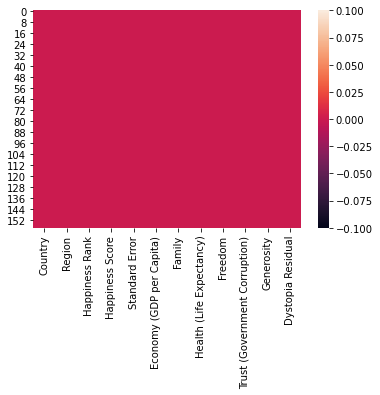

In [39]:
#Displaying null values using heatmap
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())

# Label Encoding

In [40]:
#Checking unique values in categorical features
features = df.columns
for x in features:
    if df[x].dtypes == object:
        print(f"%-30s: %5d"%(x,len(df[x].unique())))

Country                       :   158
Region                        :    10


In [41]:
#Encoding feature Region
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_Region = le.fit_transform(df['Region'])
for i,x in zip(range(len(le.classes_)),le.classes_):
    print("%4d: %s"%(i,x))


   0: Australia and New Zealand
   1: Central and Eastern Europe
   2: Eastern Asia
   3: Latin America and Caribbean
   4: Middle East and Northern Africa
   5: North America
   6: Southeastern Asia
   7: Southern Asia
   8: Sub-Saharan Africa
   9: Western Europe


In [42]:
#Replacing value of feature Region with encoded_Region
df['Region'] = encoded_Region

In [43]:
#Dropping feature Country from dataset as it can not be encoded.
df_new=df.drop(columns=['Country'])
df_new.columns

Index(['Region', 'Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

# Statistical Summary

In [44]:
#Statistical Summary of Dataset
df.describe()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# Exploratory Data Analysis (EDA)

# Univariate Analysis

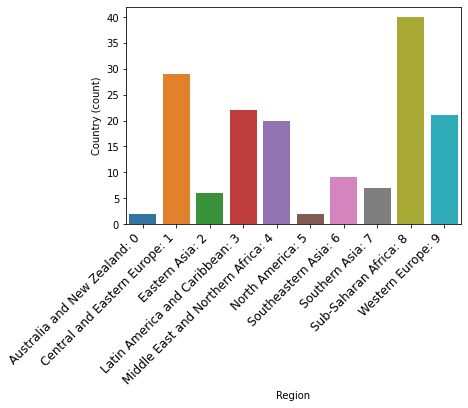

In [45]:
#Checking categorical feature Region with countplot
x_labels = ["%s: %d"%(le.classes_[i],i) for i in range(len(le.classes_))]
sns.countplot(df_new['Region'])
plt.xlabel('Region')
plt.ylabel('Country (count)')
plt.xticks(range(len(le.classes_)),x_labels,rotation=45,horizontalalignment="right",fontsize=12)
plt.show()

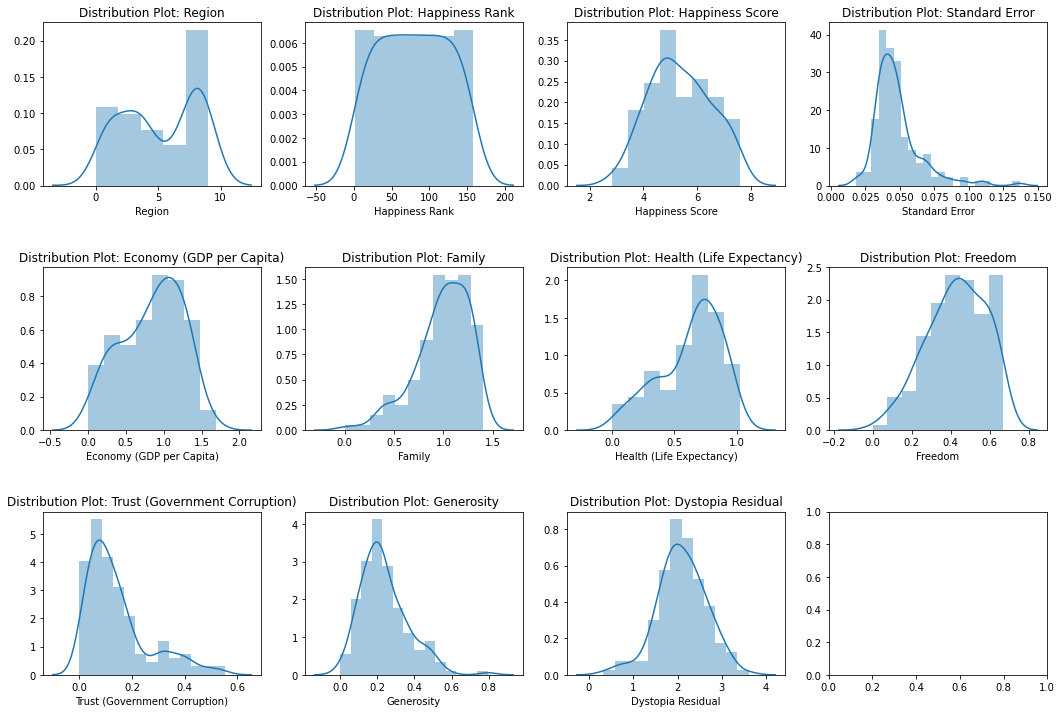

In [46]:
#Checking Data Distribution with the help of distplot.
rows = 3
cols = 4
fig, axes = plt.subplots(rows,cols,figsize=(rows*cols*1.5,rows*cols))
plt.subplots_adjust(hspace=0.5)
k=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df_new[df_new.columns[k]],ax=axes[i][j])
        axes[i][j].set_title(f"Distribution Plot: {df_new.columns[k]}")
        k += 1
        if k == len(df_new.columns):
            break

plt.show()

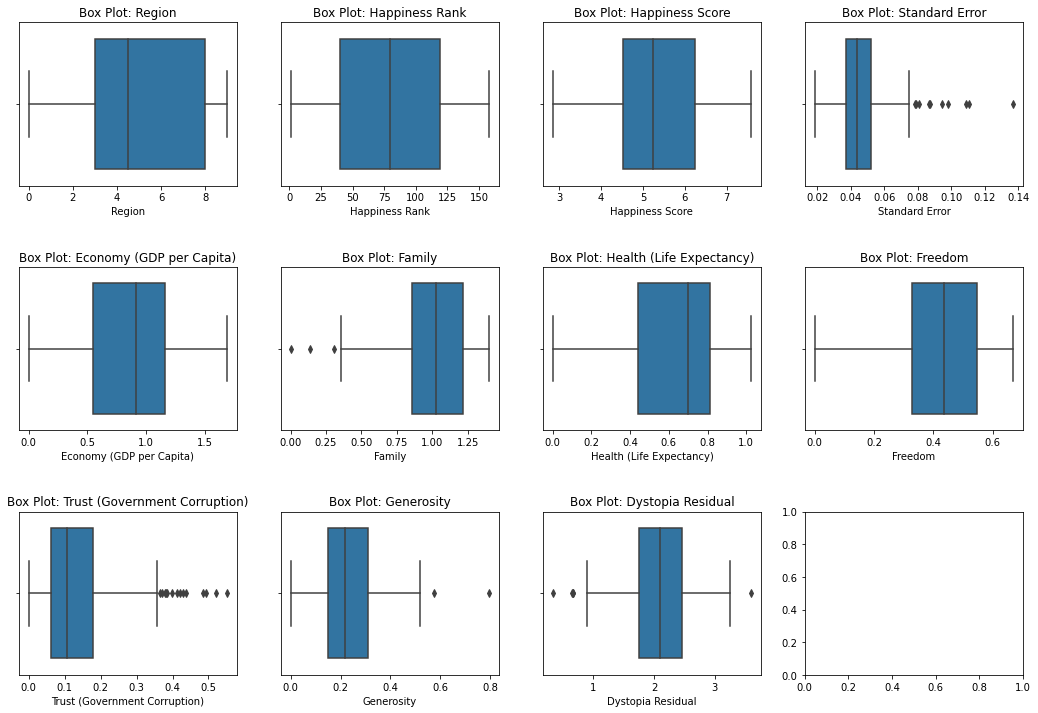

In [47]:
#Checking Data with boxplot
rows = 3
cols = 4
fig, axes = plt.subplots(rows,cols,figsize=(rows*cols*1.5,rows*cols))
plt.subplots_adjust(hspace=0.5)
k=0
for i in range(rows):
    for j in range(cols):
        sns.boxplot(df_new[df_new.columns[k]],ax=axes[i][j])
        axes[i][j].set_title(f"Box Plot: {df_new.columns[k]}")
        k += 1
        if k == len(df_new.columns):
            break

plt.show()

# Bivariate Analysis

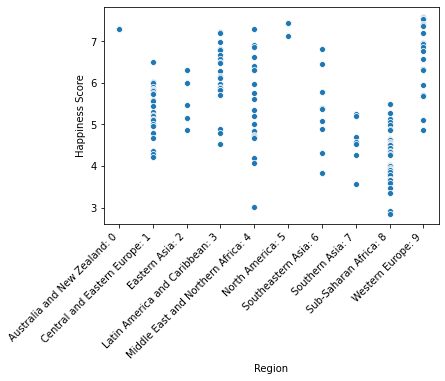

In [48]:
#Checking Relationship between Region and Happiness Score
input_x="Region" 
target="Happiness Score"
sns.scatterplot(x=input_x, y=target, data=df_new)
plt.xticks(range(len(le.classes_)),x_labels,rotation=45,horizontalalignment='right')
plt.show()

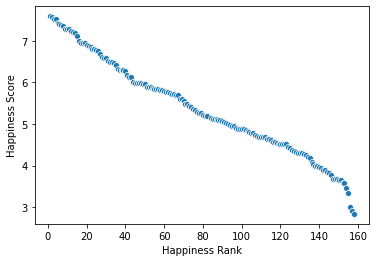

In [49]:
#Checking Relationship between Happiness Rank and Happiness Score
input_x="Happiness Rank" 
target="Happiness Score"
sns.scatterplot(x=input_x, y=target, data=df_new)
plt.show()

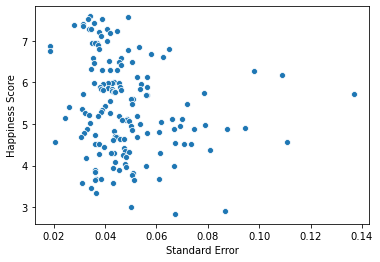

In [50]:
#Checking Relationship between Standard Error and Happiness Score
input_x="Standard Error" 
target="Happiness Score"
sns.scatterplot(x=input_x, y=target, data=df_new)
plt.show()

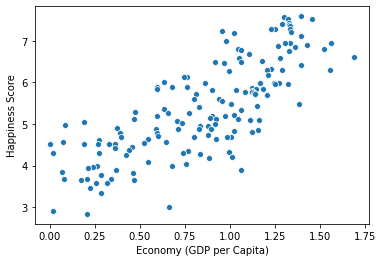

In [51]:
#Checking Relationship between Economy (GDP per Capita) and Happiness Score
input_x="Economy (GDP per Capita)" 
target="Happiness Score"
sns.scatterplot(x=input_x, y=target, data=df_new)
plt.show()

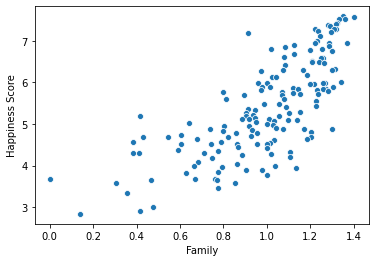

In [52]:
#Checking Relationship between Family and Happiness Score
input_x="Family" 
target="Happiness Score"
sns.scatterplot(x=input_x, y=target, data=df_new)
plt.show()

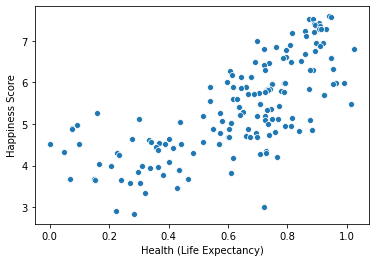

In [53]:
#Checking Relationship between Health (Life Expectancy) and Happiness Score
input_x="Health (Life Expectancy)" 
target="Happiness Score"
sns.scatterplot(x=input_x, y=target, data=df_new)
plt.show()

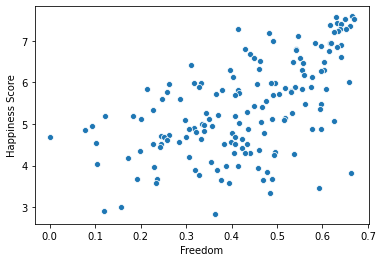

In [54]:
#Checking Relationship between Freedom and Happiness Score
input_x="Freedom" 
target="Happiness Score"
sns.scatterplot(x=input_x, y=target, data=df_new)
plt.show()

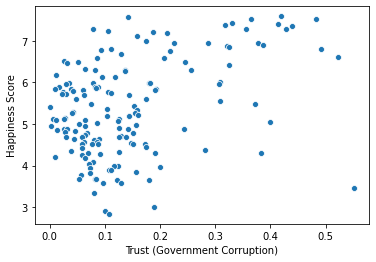

In [55]:
#Checking Relationship between Trust (Governmnet Corruption) and Happiness Score
input_x="Trust (Government Corruption)" 
target="Happiness Score"
sns.scatterplot(x=input_x, y=target, data=df_new)
plt.show()

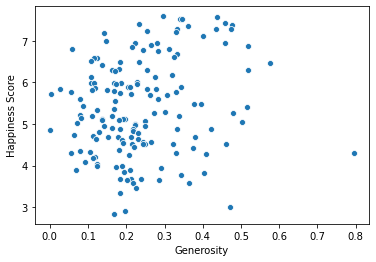

In [56]:
#Checking Relationship between Generosity and Happiness Score
input_x="Generosity" 
target="Happiness Score"
sns.scatterplot(x=input_x, y=target, data=df_new)
plt.show()

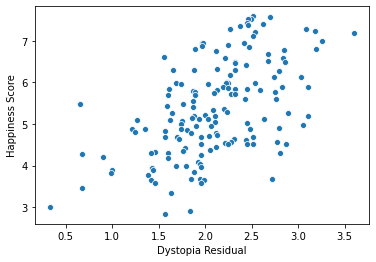

In [57]:
#Checking Relationship between Dystopia Residual and Happiness Score
input_x="Dystopia Residual" 
target="Happiness Score"
sns.scatterplot(x=input_x, y=target, data=df_new)
plt.show()

# Multi-Variate Analysis

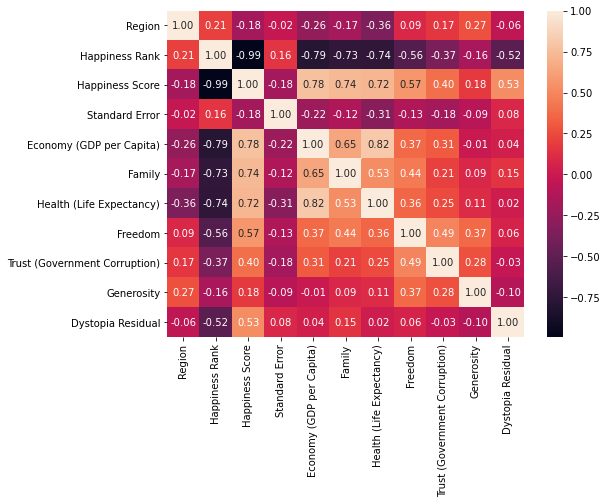

In [58]:
#Checking Correlation of Features
df_corr = df_new.corr()

#Showing Correlation with the help of heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, annot=True, fmt='.2f')
plt.show()

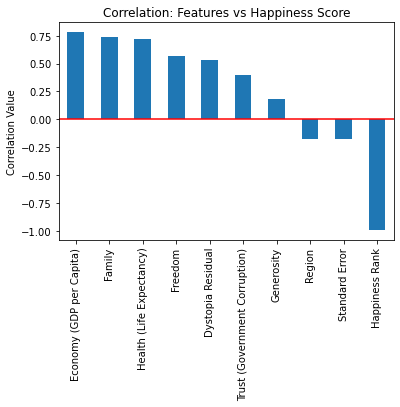

In [59]:
#Showing Correlation of Features with Happiness Score using bar plot
df_corr['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot.bar()
plt.plot([-1,10],[0,0],color='r')
plt.ylabel('Correlation Value')
plt.title('Correlation: Features vs Happiness Score')
plt.show()

# Skewness

In [60]:
#Checking skewness
df_new.skew()

Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

# Outlier Removal

In [61]:
#Checking outlier with zscore
from scipy.stats import zscore
import numpy as np

z = np.abs(zscore(df_new))
np.where(z>3) #Printing location of outliers

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([ 8,  3,  3,  3,  9,  5,  8, 10,  5], dtype=int64))

In [62]:
#Removing outliers
df_wo = df_new[(z<=3).all(axis=1)]
print(f"Original Shape: {df_new.shape}")
print(f"New Shape: {df_wo.shape}")
print(f"% Loss: {(len(df_new)-len(df_wo))*100/len(df_new)}%")

Original Shape: (158, 11)
New Shape: (149, 11)
% Loss: 5.69620253164557%


# Preparing Data for Model

In [63]:
#Seperating Input and Output variables.
X = df_wo.drop(columns=['Happiness Score'])
Y = df_wo['Happiness Score']
print(X.shape)
print(Y.shape)

(149, 10)
(149,)


In [64]:
#Treating skewness
from sklearn.preprocessing import power_transform
X_t = power_transform(X)

In [65]:
#Scaling Data for model using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(X_t)

# Finding Best Model

In [66]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Defining function for best random state
def get_best_rstate(r,model,x,y,test_size=0.25):
    best_rState = 0
    best_r2Score = 0
    for i in range(r):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=i)
        model.fit(x_train,y_train)
        predict_y = model.predict(x_test)
        temp_r2Score = r2_score(y_test,predict_y)
        if temp_r2Score>best_r2Score:
            best_r2Score = temp_r2Score
            best_rState = i
            
    return best_rState, best_r2Score

#Defining function for best cv
def get_best_cv(model,parameters,x_train,y_train):
    best_cv = 0
    best_cvScore = 0
    for i in range(2,20):
        gscv = GridSearchCV(model,parameters)
        gscv.fit(x_train,y_train)
        temp_cvScore = cross_val_score(gscv.best_estimator_,x_train,y_train,cv=i).mean()
        if temp_cvScore>best_cvScore:
            best_cvScore = temp_cvScore
            best_cv = i
            
    return best_cv, best_cvScore


# 1.LinearRegression

In [67]:
from sklearn.linear_model import LinearRegression
#Finding best rand_state for train test split
best_rState, best_r2Score = get_best_rstate(400,LinearRegression(),scaled_x,Y)
print(f"Best random_state: {best_rState} with best r2_score: {best_r2Score}")

Best random_state: 373 with best r2_score: 0.9985859768986914


In [68]:
#Splitting train test with random_state = 373
lr_x_train,lr_x_test,lr_y_train,lr_y_test = train_test_split(scaled_x,Y,test_size=0.25,random_state=373)

In [69]:
#Hypertuning parameters
parameters = {
    "fit_intercept": [True,False],
    "normalize": [True,False],
}

#Finding best CV
best_cv, lr_best_cvScore = get_best_cv(LinearRegression(),parameters,lr_x_train,lr_y_train)
print(f"Best CV: {best_cv} with best cross_val_score: {lr_best_cvScore}")

Best CV: 10 with best cross_val_score: 0.9921418926499337


In [70]:
#Building Final Model with hpypertuned parameters and cv = 10
lr_gscv = GridSearchCV(LinearRegression(),parameters,cv=10)
lr_gscv.fit(lr_x_train,lr_y_train)
print(lr_gscv.best_params_)

{'fit_intercept': True, 'normalize': True}


In [71]:
#Checking Final Performance of Model
lr_predict_y = lr_gscv.best_estimator_.predict(lr_x_test)

lr_r2Score = r2_score(lr_y_test,lr_predict_y)
lr_mse = mean_squared_error(lr_y_test,lr_predict_y)
lr_mae = mean_absolute_error(lr_y_test,lr_predict_y)

print(f"R2_SCORE: {round(lr_r2Score*100,2)}%\t MSE: {lr_mse}\t RMSE: {np.sqrt(lr_mse)}\t MAE: {lr_mae}")

R2_SCORE: 99.86%	 MSE: 0.001872235388540526	 RMSE: 0.043269335429846	 MAE: 0.03794318251219219


# 2. Lasso

In [72]:
from sklearn.linear_model import Lasso
#Finding the best random state for train test split
best_rState, best_r2Score = get_best_rstate(400,Lasso(),scaled_x,Y)

print(f"Best random_state: {best_rState} with best r2_score: {best_r2Score}")

Best random_state: 321 with best r2_score: 0.3423975593833096


In [73]:
#Splitting train test data with random_state = 321
la_x_train,la_x_test,la_y_train,la_y_test = train_test_split(scaled_x,Y,test_size=0.25,random_state=321)

In [74]:
import warnings
warnings.simplefilter('ignore')
#Hypertuning parameters
parameters = {
    "alpha": [0.0001,0.001,0.01,0.1,1.0],
    "fit_intercept": [True,False],
    "normalize": [True,False],
    "tol": [1e-6,1e-5,1e-4],
    "selection": ['cyclic','random'],
}
#Finding best CV
best_cv,la_best_cvScore = get_best_cv(Lasso(),parameters,la_x_train,la_y_train)
print(f"Best CV: {best_cv} with best cross_val_score: {la_best_cvScore}")

Best CV: 12 with best cross_val_score: 0.994951829932195


In [75]:
#Building final model with hypertuned parameters with cv=12
la_gscv = GridSearchCV(Lasso(),parameters,cv=12)
la_gscv.fit(la_x_train,la_y_train)

print(la_gscv.best_params_)

{'alpha': 0.0001, 'fit_intercept': True, 'normalize': True, 'selection': 'random', 'tol': 0.0001}


In [76]:
#Checking Final Performanace of the model
la_predict_y = la_gscv.predict(la_x_test)

la_r2Score = r2_score(la_y_test,la_predict_y)
la_mse = mean_squared_error(la_y_test,la_predict_y)
la_mae = mean_absolute_error(la_y_test,la_predict_y)

print(f"R2_SCORE: {round(la_r2Score*100,2)}%\t MSE: {la_mse}\t RMSE: {np.sqrt(la_mse)}\t MAE: {la_mae}")

R2_SCORE: 99.48%	 MSE: 0.00416667994794425	 RMSE: 0.0645498253130421	 MAE: 0.0466799772500778


# 3. Ridge

In [77]:
from sklearn.linear_model import Ridge
#Finding the best random state for train test split
best_rState, best_r2Score = get_best_rstate(400,Ridge(),scaled_x,Y)

print(f"Best random_state: {best_rState} with best r2_score: {best_r2Score}")

Best random_state: 373 with best r2_score: 0.9984840924192643


In [78]:
#Splitting train test data with random_state = 373
ri_x_train,ri_x_test,ri_y_train,ri_y_test = train_test_split(scaled_x,Y,test_size=0.25,random_state=373)

In [79]:
#Hypertuning parameters
parameters = {
    "alpha": [0.0001,0.001,0.01,0.1,1.0],
    "fit_intercept": [True,False],
    "normalize": [True,False],
    "tol": [1e-6,1e-5,1e-4],
    "solver": ['auto','svd','cholesky','lsqr','sparse_cg','sag','saga'],
}
#Finding best CV
best_cv,ri_best_cvScore = get_best_cv(Ridge(),parameters,ri_x_train,ri_y_train)
print(f"Best CV: {best_cv} with best cross_val_score: {ri_best_cvScore}")

Best CV: 10 with best cross_val_score: 0.9927239612090297


In [80]:
#Building final model with hypertuned parameters with cv=10
ri_gscv = GridSearchCV(Ridge(),parameters,cv=10)
ri_gscv.fit(ri_x_train,ri_y_train)

print(ri_gscv.best_params_)

{'alpha': 1.0, 'fit_intercept': True, 'normalize': False, 'solver': 'saga', 'tol': 0.0001}


In [81]:
#Checking Final Performanace of the model
ri_predict_y = ri_gscv.predict(ri_x_test)

ri_r2Score = r2_score(ri_y_test,ri_predict_y)
ri_mse = mean_squared_error(ri_y_test,ri_predict_y)
ri_mae = mean_absolute_error(ri_y_test,ri_predict_y)

print(f"R2_SCORE: {round(ri_r2Score*100,2)}%\t MSE: {ri_mse}\t RMSE: {np.sqrt(ri_mse)}\t MAE: {ri_mae}")

R2_SCORE: 99.85%	 MSE: 0.0020072572819881565	 RMSE: 0.044802424956559624	 MAE: 0.03852568149782907


# 4. SGDRegressor

In [82]:
from sklearn.linear_model import SGDRegressor
#Finding the best random state for train test split
best_rState, best_r2Score = get_best_rstate(400,SGDRegressor(),scaled_x,Y)

print(f"Best random_state: {best_rState} with best r2_score: {best_r2Score}")

Best random_state: 373 with best r2_score: 0.9965134188780209


In [83]:
#Splitting train test data with random_state = 266
sg_x_train,sg_x_test,sg_y_train,sg_y_test = train_test_split(scaled_x,Y,test_size=0.25,random_state=266)

In [84]:
#Hypertuning parameters
parameters = {
    "loss": ['huber','squared_loss','epsilon_insensitive','squared_epsilon_insensitive'],
    "penalty": ['l2','l1','elasticnet'],
    "alpha": [0.00001,0.0001,0.001,0.01],
    "fit_intercept": [True,False],
    "shuffle": [True,False],
    "tol": [1e-6,1e-5,1e-4],
    "learning_rate": ['constant','optimal','invscaling','adaptive'],
}
#Finding best CV
best_cv,sg_best_cvScore = get_best_cv(SGDRegressor(),parameters,sg_x_train,sg_y_train)
print(f"Best CV: {best_cv} with best cross_val_score: {sg_best_cvScore}")

Best CV: 5 with best cross_val_score: 0.9936731996292046


In [89]:
#Building final model with hypertuned parameters with cv=5
sg_gscv = GridSearchCV(SGDRegressor(),parameters,cv=5)
sg_gscv.fit(sg_x_train,sg_y_train)

print(sg_gscv.best_params_)

{'alpha': 0.001, 'fit_intercept': True, 'learning_rate': 'constant', 'loss': 'huber', 'penalty': 'elasticnet', 'shuffle': True, 'tol': 1e-06}


In [91]:
#Checking Final Performanace of the model
sg_predict_y = sg_gscv.predict(sg_x_test)

sg_r2Score = r2_score(sg_y_test,sg_predict_y)
sg_mse = mean_squared_error(sg_y_test,sg_predict_y)
sg_mae = mean_absolute_error(sg_y_test,sg_predict_y)

print(f"R2_SCORE: {round(sg_r2Score*100,2)}%\t MSE: {sg_mse}\t RMSE: {np.sqrt(sg_mse)}\t MAE: {sg_mae}")

R2_SCORE: 99.83%	 MSE: 0.0025757999528230775	 RMSE: 0.050752339382762225	 MAE: 0.04087972931509895


# Best Model Selection

In [92]:
#Comparing models
model_name = ['LinearRegression','Lasso','Ridge','SGDRegressor']
r2Score = [lr_r2Score,la_r2Score,ri_r2Score,sg_r2Score]
mse = [lr_mse,la_mse,ri_mse,sg_mse]
mae = [lr_mae,la_mae,ri_mae,sg_mae]
cvs = [lr_best_cvScore,la_best_cvScore,ri_best_cvScore,sg_best_cvScore]

models = pd.DataFrame({
    "name":model_name,
    "r2_score":r2Score,
    "mean_squared_error":mse,
    "mean_absolute_error":mae,
    "cross_val_score":cvs
})
models["r2_score - cross_val_score"]=models["r2_score"]-models["cross_val_score"]
models

,name,r2_score,mean_squared_error,mean_absolute_error,cross_val_score,r2_score - cross_val_score
0,LinearRegression,0.998586,0.001872,0.037943,0.992142,0.006444
1,Lasso,0.994769,0.004167,0.046680,0.994952,-0.000182
2,Ridge,0.998484,0.002007,0.038526,0.992724,0.005760
3,SGDRegressor,0.998277,0.002576,0.040880,0.993673,0.004603


# Saving Model or Serialization

In [93]:
import joblib
filename = "world_happiness_project.pkl"
joblib.dump(la_gscv.best_estimator_,open(filename,'wb'))

# Conclusion

In [94]:
cnc = pd.DataFrame({"Original":np.array(la_y_test),"Predicted":np.array(la_predict_y)})
cnc

,Original,Predicted
0,5.948,6.000005
1,4.419,4.303080
2,4.677,4.657936
3,5.589,5.558830
4,6.810,6.782759
5,5.878,5.901670
6,4.550,4.463187
7,5.984,6.096732
8,4.874,4.878935
9,6.302,6.329502
